In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
import json
import numpy as np
import scipy.stats as st
import scipy as sp
import os
from PIL import ImageColor
import re

from src.json_helpers import GlobalJsonDecoder
from src.data_models.positional.waypoint import Waypoint, Waypoints
from src.data_models.probability_map import ProbabilityMap
from src.waypoint_generation import WaypointFactory, WaypointAlgSettings
from src.enums import WaypointAlgorithmEnum
from src.simulation.simulation import SimRunnerOutput
from src.waypoint_generation.waypoint_settings import SarGenOutput, WpGenOutput

In [33]:
from src.waypoint_generation import CostFunc
cost_func = CostFunc()

wp_gen_settings = WaypointAlgSettings.Global()

2020-12-01 10:09:33.129 | DEBUG    | src.matlab_helper:__init__:43 - Starting <module 'matlab.engine' from '/home/jhewers/Documents/meng_project/code/venv/lib/python3.8/site-packages/matlab/engine/__init__.py'>
2020-12-01 10:09:36.919 | DEBUG    | src.matlab_helper:__init__:45 - <module 'matlab.engine' from '/home/jhewers/Documents/meng_project/code/venv/lib/python3.8/site-packages/matlab/engine/__init__.py'> instance at <matlab.engine.matlabengine.MatlabEngine object at 0x7fdcfc0c7ee0>


In [36]:
reg = r'output_(wp|sar|sim)_(\d)\.json'
data_sar = {}
data_sim = {}
data_wp = {}

DIR = '/home/jhewers/Documents/meng_project/gend_data/'

for f in [file_ for file_ in os.listdir(DIR) if not os.path.isdir(file_)]:
    re_search = re.search(reg,f)
    if re_search is None:
        continue
    type_ = re_search.groups()[0]
    num = re_search.groups()[1]

    print(f"{f} | {type(data)}")
    with open(os.path.join(DIR,f),'r') as file_:
        data = json.load(file_,cls=GlobalJsonDecoder)
    if isinstance(data,SarGenOutput):
        data_sar[num] = data
    elif isinstance(data,WpGenOutput):
        data_wp[num] = data
    elif isinstance(data,SimRunnerOutput):
        data_sim[num] = data

k,d = next(iter(data_wp.items()))
k = '5'

output_wp_3.json | <class 'src.waypoint_generation.waypoint_settings.SarGenOutput'>
output_sim_5.json | <class 'src.waypoint_generation.waypoint_settings.WpGenOutput'>
output_sim_3.json | <class 'src.simulation.simulation.SimRunnerOutput'>
output_sar_1.json | <class 'src.simulation.simulation.SimRunnerOutput'>
output_sim_1.json | <class 'src.waypoint_generation.waypoint_settings.SarGenOutput'>
output_sim_4.json | <class 'src.simulation.simulation.SimRunnerOutput'>
output_wp_4.json | <class 'src.simulation.simulation.SimRunnerOutput'>
output_sar_4.json | <class 'src.waypoint_generation.waypoint_settings.WpGenOutput'>
output_sim_2.json | <class 'src.waypoint_generation.waypoint_settings.SarGenOutput'>
output_wp_2.json | <class 'src.simulation.simulation.SimRunnerOutput'>
output_sar_5.json | <class 'src.waypoint_generation.waypoint_settings.WpGenOutput'>
output_sar_3.json | <class 'src.waypoint_generation.waypoint_settings.SarGenOutput'>
output_wp_5.json | <class 'src.waypoint_generation.

WaypointAlgorithmEnum.LHC_GW_CONV
143.4760 units long
3.2901s


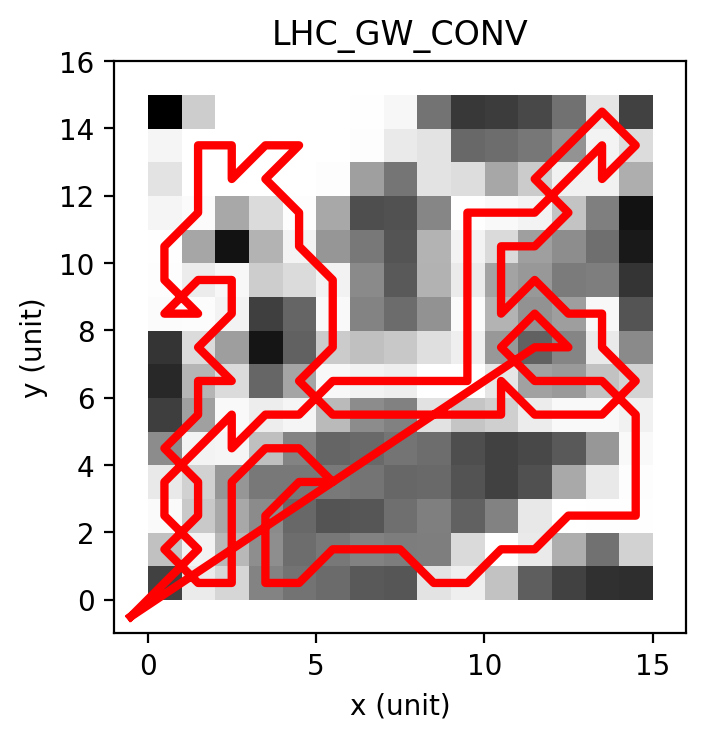

WaypointAlgorithmEnum.MODIFIED_LAWNMOWER
752.4142 units long
72.9593s


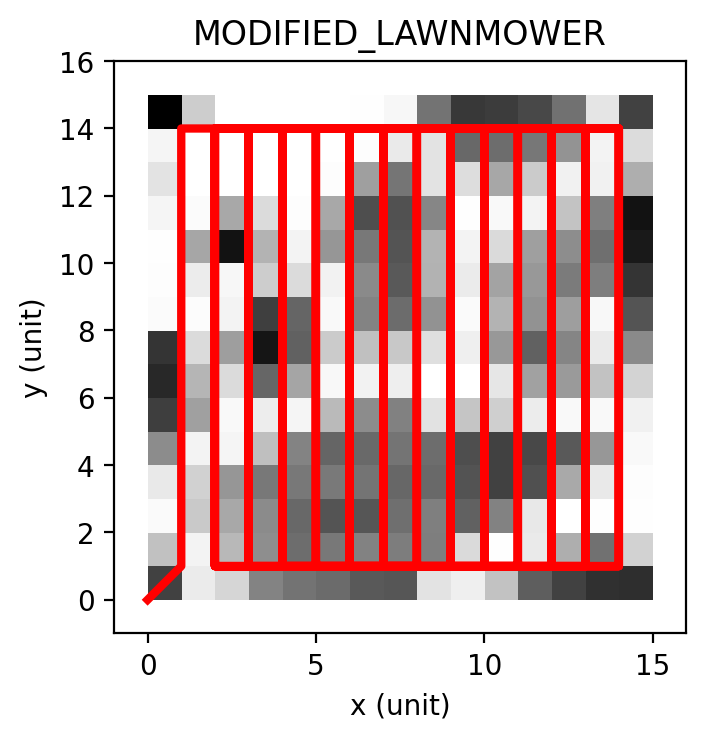

WaypointAlgorithmEnum.PARALLEL_SWATHS
227.5033 units long
0.0008s


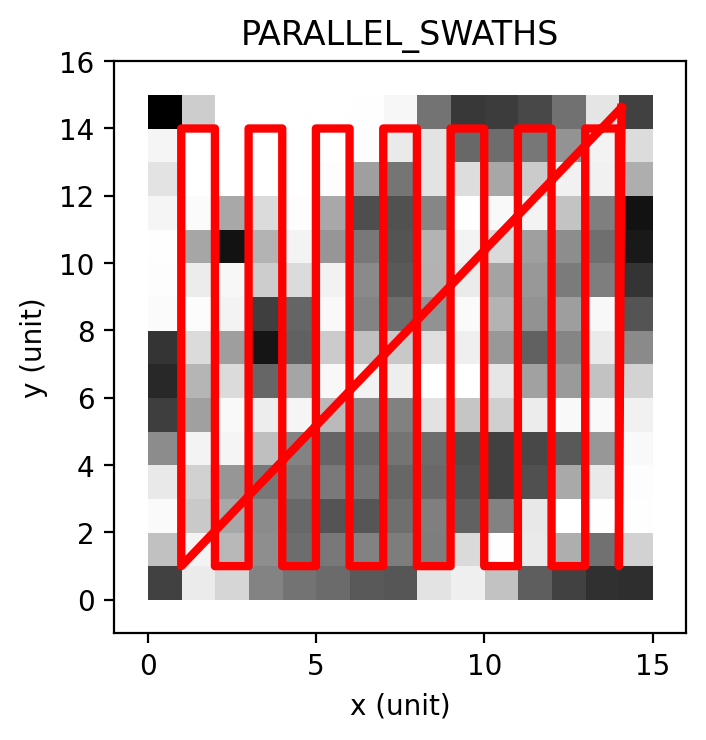

WaypointAlgorithmEnum.PABO_FMINCON
78.4920 units long
35.9397s


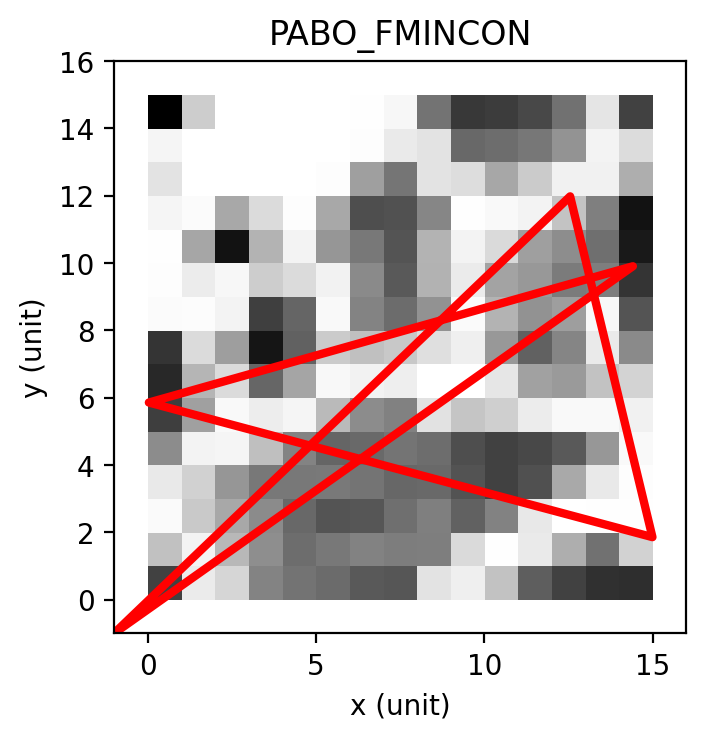

WaypointAlgorithmEnum.PABO_GA
69.3285 units long
495.9190s


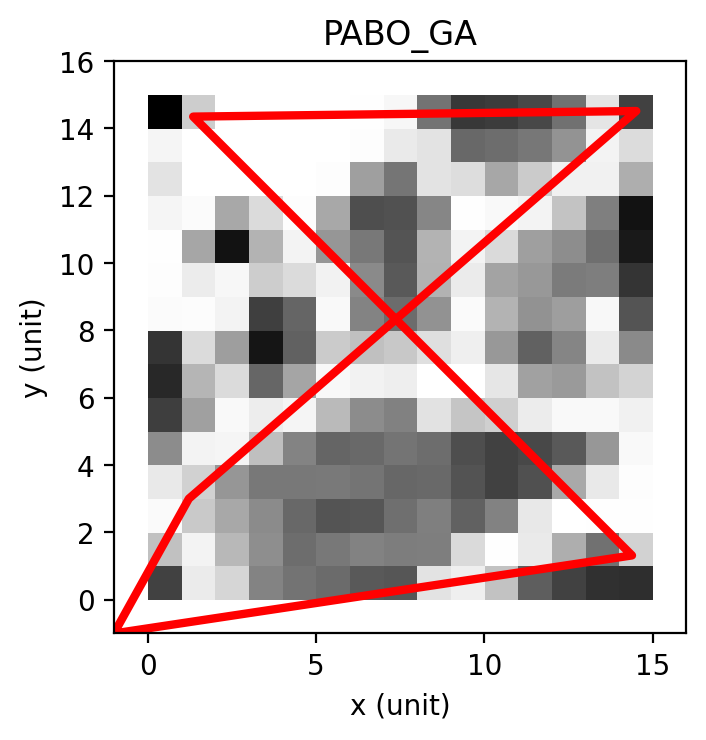

WaypointAlgorithmEnum.PABO_PARTICLESWARM
90.2577 units long
229.0932s


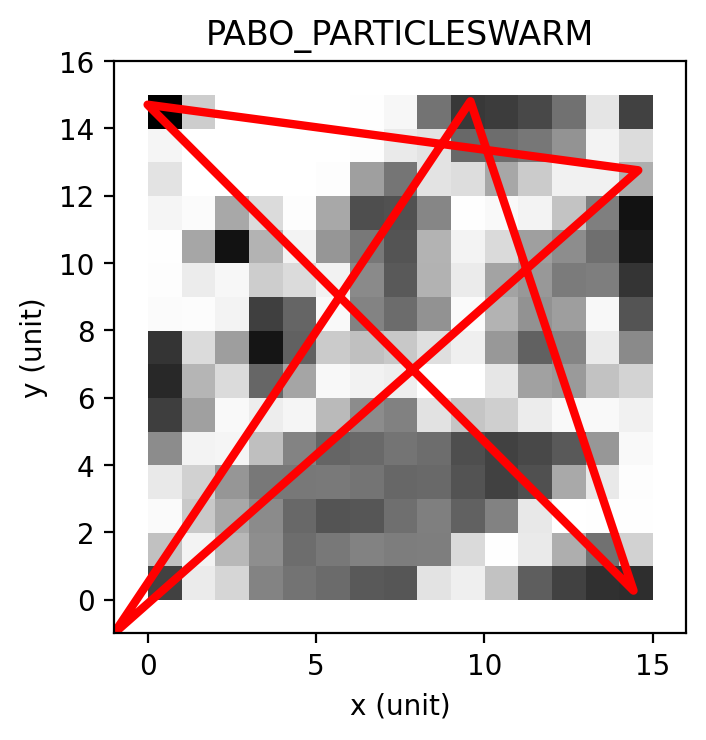

In [37]:
def plot(alg,d):
    fig, ax = plt.subplots()
    
    ax.imshow(d.img, interpolation=None,origin='bottom', extent=[0, d.img.shape[0], 0, d.img.shape[1]], cmap='gray')
    wps = d.data[str(alg)]['wps']
    
    # npts = 400
    
    # ind = int(np.where([str(data_sim.data[i][0])==alg for i in range(len(data_sim.data))])[0])
    
    # sim = [Waypoint(f[1]) for f in data_sim.data[ind][1].found]
    
    # sar_placed = [f for f in data_sar.data[::int(len(data_sar.data)/npts)]]
    # sim_found = [f for f in sar_placed if f in sim]    
    # not_found = [f for f in sar_placed if f not in sim]    
       
    # p = len(sim_found)/len(sar_placed)
    # not_found = Waypoints(np.take(not_found,np.random.choice(len(not_found),int(len(not_found)*(1-p))),axis=0))
    # sim_found = Waypoints(np.take(sim_found,np.random.choice(len(sim_found),int(len(sim_found)*p)),axis=0))
    
    ax.plot(wps.x,wps.y,'r',linewidth=3)
    # ax.scatter(not_found.x, not_found.y,color='r')
    # ax.scatter(sim_found.x, sim_found.y,color='b')
        
    ax.set_xlim(-1,d.img.shape[0]+1)
    ax.set_ylim(-1,d.img.shape[1]+1)
    ax.set_xlabel("x (unit)")
    ax.set_ylabel("y (unit)")
    
    s = str(alg).split('.')[1]
    fig.savefig(s+"_path.png",dpi=300)
    ax.set_title(s)
       
    dist = wps.dist
    return fig,ax,dist
    
k,d = next(iter(data_wp.items())) # Get first item in data_wp
for key in d.data:
    fig,ax,dist = plot(key,d)
    print(f"{key}\n{dist:.4f} units long\n{d.data[key]['time']:.4f}s")
    plt.tight_layout()
    plt.show()

In [38]:
def plot_bar(x,y,x_label,y_label):

    fig,ax = plt.subplots()
    plt.xticks(rotation=45)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.grid(True, linestyle='--', which='major',
                       color='grey', alpha=.25)
    ax.bar(x,y)   

    return fig,ax

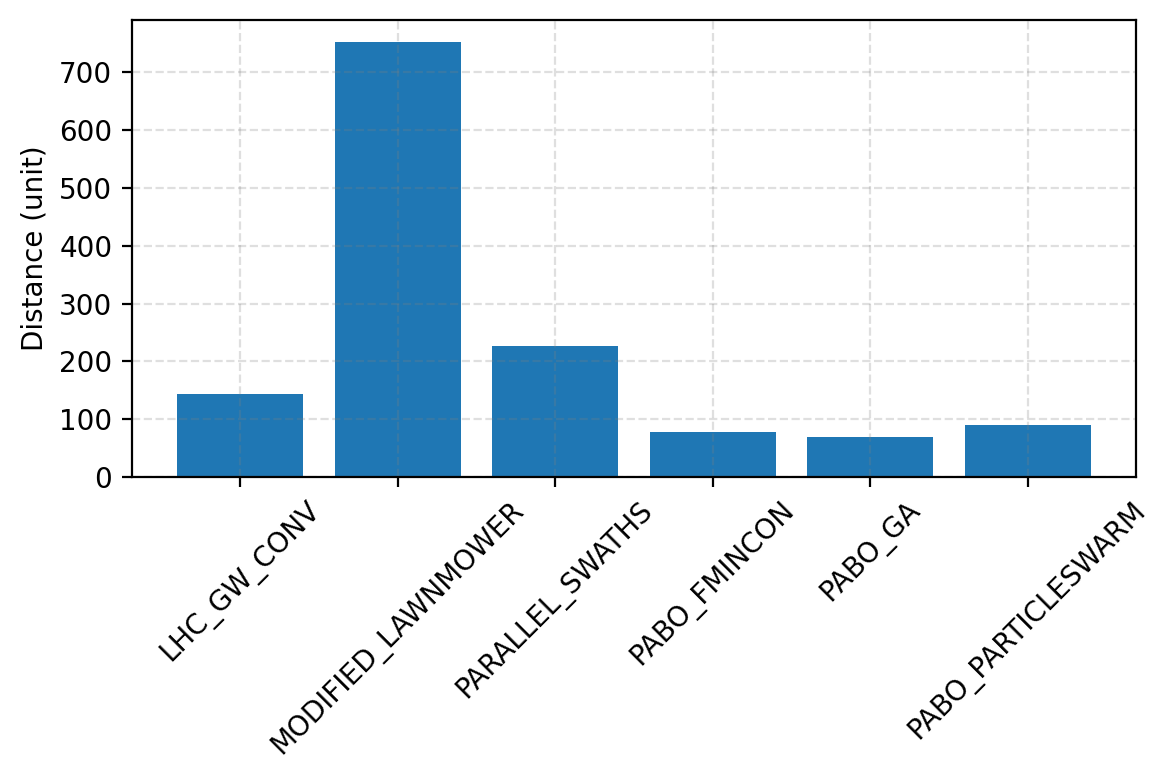

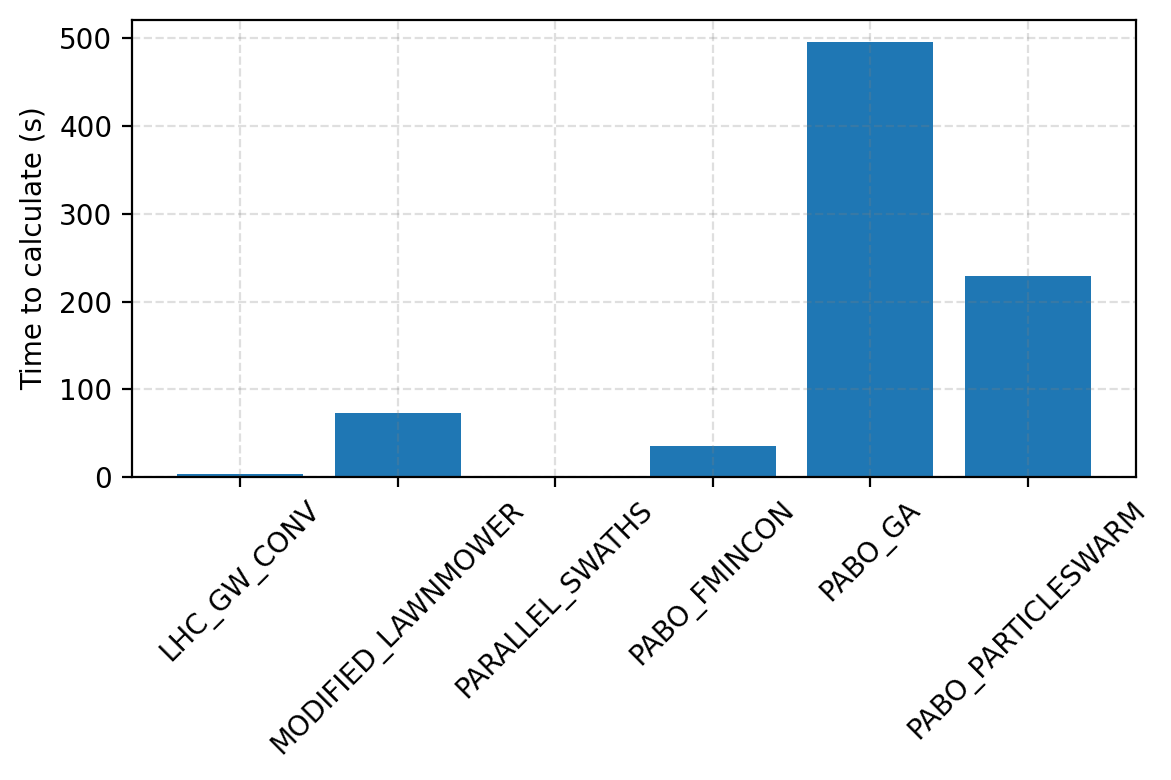

In [31]:
dists = [item[1]['wps'].dist for item in data_wp[k].data.items()]
times = [item[1]['time'] for item in data_wp[k].data.items()]

x = [str(s).split('.')[1] for s in data_wp[k].data.keys()]

fig,ax=plot_bar(x,dists,"","Distance (unit)")
plt.tight_layout()
fig.savefig("unit_distances_all.png")

fig,ax=plot_bar(x,times,"","Time to calculate (s)")
plt.tight_layout()
fig.savefig("time_to_calculate_all.png")

152 number of points to calculate...
Final cost for WaypointAlgorithmEnum.LHC_GW_CONV is -0.4563
151 number of points to calculate...
Final cost for WaypointAlgorithmEnum.MODIFIED_LAWNMOWER is -0.8436
151 number of points to calculate...
Final cost for WaypointAlgorithmEnum.PARALLEL_SWATHS is -0.7898
151 number of points to calculate...
Final cost for WaypointAlgorithmEnum.PABO_FMINCON is -0.2796
151 number of points to calculate...
Final cost for WaypointAlgorithmEnum.PABO_GA is -0.2152
151 number of points to calculate...
Final cost for WaypointAlgorithmEnum.PABO_PARTICLESWARM is -0.3298


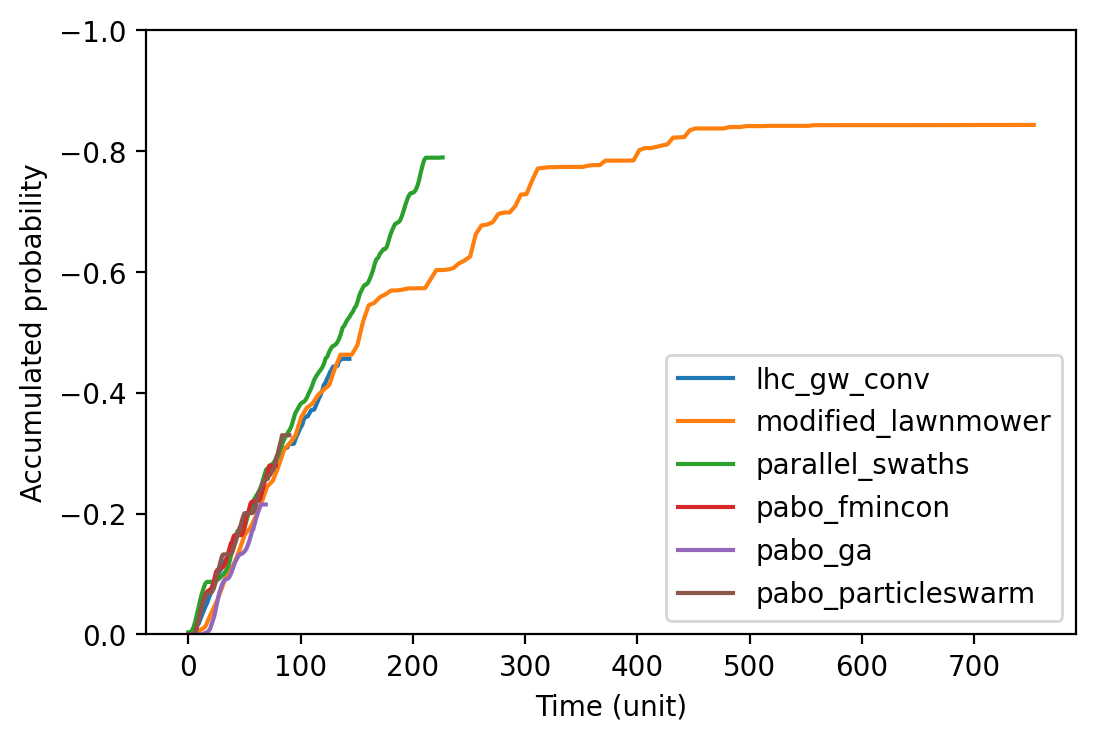

In [39]:
# Cost over time
n_points = 150
for alg,vehicle in data_sim[k].data:
    c_arr = []
    wp_arr = []
    t_arr = []
    
    slicer = int(len(vehicle.pos.x)/n_points)
    x = np.array(vehicle.pos.x)[::slicer]
    y = np.array(vehicle.pos.y)[::slicer]
    t = vehicle.t[::slicer]
    print(f"{len(x)} number of points to calculate...")
    for xi,yi,ti in zip(x, y, t):
        wp_arr.append(Waypoint(xi,yi))
        wps = Waypoints(wp_arr)
        cost = cost_func.calculate(wps,data_wp[k].img)
        t_arr.append(ti)
        c_arr.append(cost)    
    print(f"Final cost for {alg} is {cost:.4f}")
    plt.plot(t_arr,c_arr, label=str(alg).split('.')[1].lower())
plt.xlabel("Time (unit)")
plt.ylabel("Accumulated probability")
plt.ylim([0, -1])
plt.legend()
fig = plt.gcf()
plt.show()
fig.savefig("probability_over_sim_time.png",dpi=300)




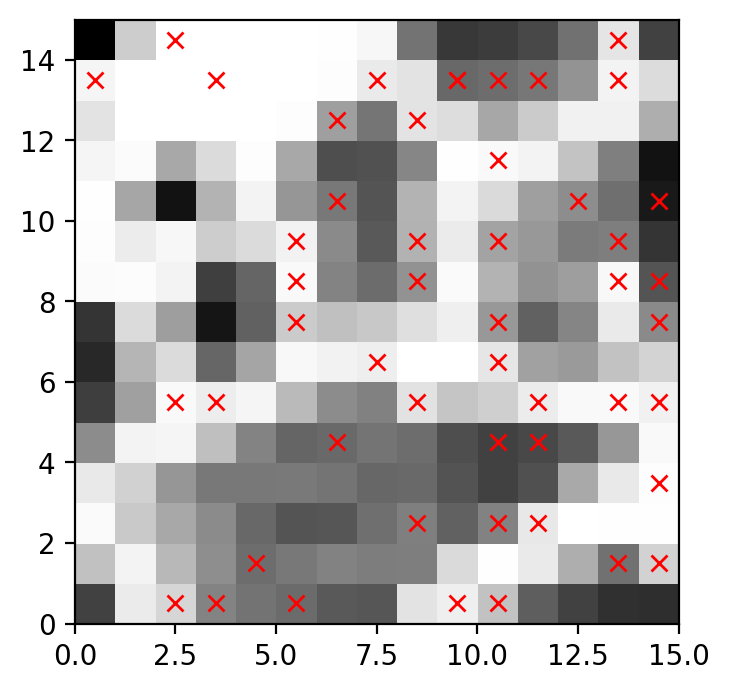

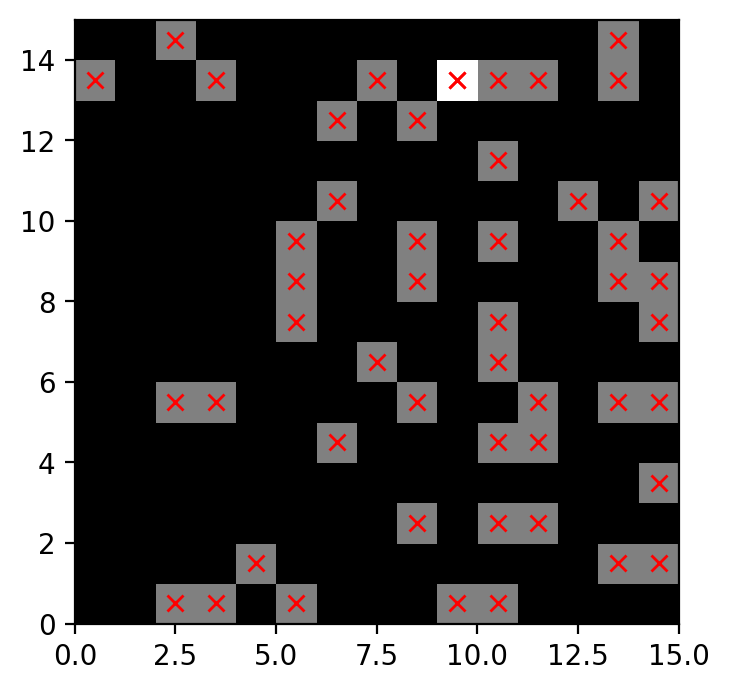

In [40]:
prob = data_wp[k].img
points = prob.place(int(50))

x,y = np.meshgrid(np.arange(0,prob.shape[0]),np.arange(0,prob.shape[1]))
x,y = x.flatten(),y.flatten()
xy  = np.vstack((x,y)).T

img_placed = np.zeros(prob.shape)

unique, counts = np.unique([f"{f.x},{f.y}" for f in points], return_counts=True)
unique = [(int(float(f)),int(float(g))) for f,g in [h.split(',') for h in unique]]

for xyi, c in zip(unique,counts):
    x,y = xyi
    img_placed[x,y] = c
img_placed = img_placed.T/np.sum(img_placed)

points = points.toNumpyArray()
plt.imshow(prob, interpolation=None,origin='bottom', extent=[0, prob.shape[0], 0, prob.shape[1]], cmap='gray')
plt.plot(points[:,0]+0.5,points[:,1]+0.5,'rx')
plt.show()
plt.imshow(img_placed, interpolation=None,origin='bottom', extent=[0, prob.shape[0], 0, prob.shape[1]],cmap='gray')
plt.plot(points[:,0]+0.5,points[:,1]+0.5,'rx')
plt.show()

WaypointAlgorithmEnum.LHC_GW_CONV: 45.64% found (228176 out of 500000)
WaypointAlgorithmEnum.LHC_GW_CONV w/ mean time to found = 66.93 and found before endurance limit (1200s) = 731.12%
WaypointAlgorithmEnum.MODIFIED_LAWNMOWER: 94.62% found (473090 out of 500000)
WaypointAlgorithmEnum.MODIFIED_LAWNMOWER w/ mean time to found = 183.61 and found before endurance limit (1200s) = 1515.88%
WaypointAlgorithmEnum.PARALLEL_SWATHS: 87.68% found (438404 out of 500000)
WaypointAlgorithmEnum.PARALLEL_SWATHS w/ mean time to found = 103.86 and found before endurance limit (1200s) = 1404.74%
WaypointAlgorithmEnum.PABO_FMINCON: 25.93% found (129674 out of 500000)
WaypointAlgorithmEnum.PABO_FMINCON w/ mean time to found = 37.18 and found before endurance limit (1200s) = 415.50%
WaypointAlgorithmEnum.PABO_GA: 24.27% found (121364 out of 500000)
WaypointAlgorithmEnum.PABO_GA w/ mean time to found = 35.80 and found before endurance limit (1200s) = 388.88%
WaypointAlgorithmEnum.PABO_PARTICLESWARM: 30.90% f

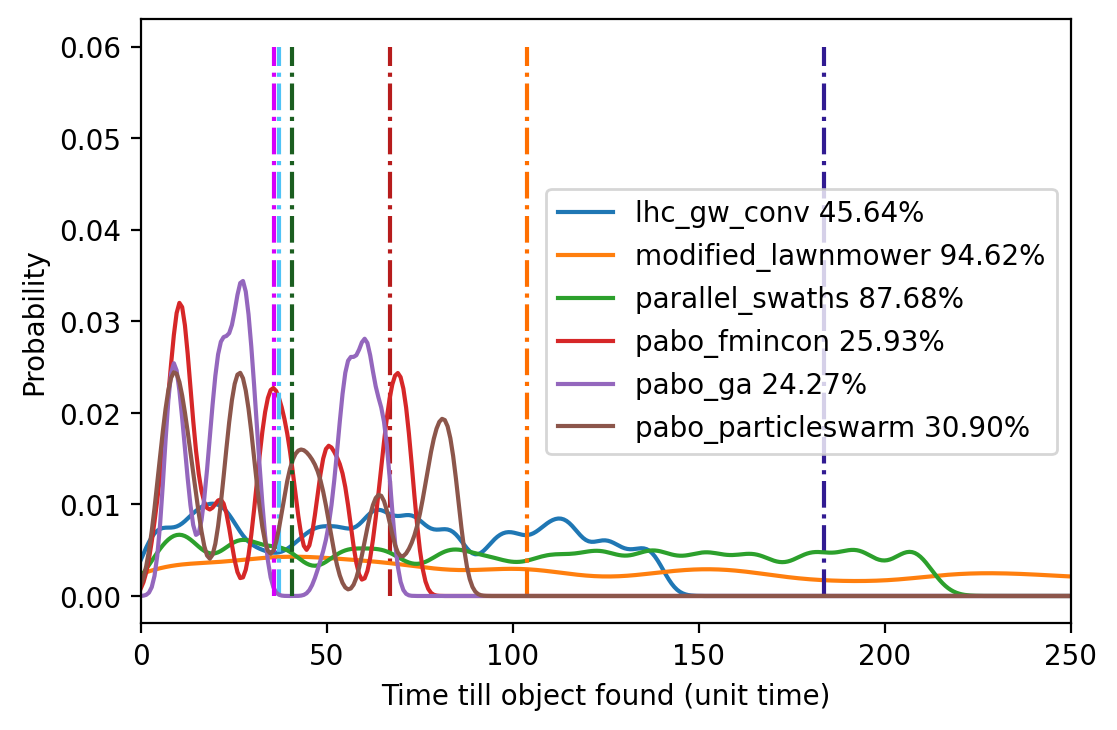

In [55]:
total_objects = len(data_sar[k].data)*len(data_sar)
colors = np.array([ImageColor.getcolor(f, "RGB") for f in 
         ['#b71c1c',
          '#311b92',
          '#ff6f00', 
          '#4fc3f7',
          '#d500f9',
          '#1b5e20']])/255

t_hists = {}
max_t = -np.inf
for k in data_sim:
    for i,data in enumerate(data_sim[k].data):
        vehicle = data[1]
        alg = data[0]
        v_found = np.array(vehicle.found)[:,0]
        if alg in t_hists:
            t_hists[alg] = np.append(t_hists[alg],v_found)
        else:
            t_hists[alg] = v_found
        if np.max(v_found) > max_t: max_t = np.max(v_found)

dct = {}
cutoff = 20*60
for i,(alg,t_hist) in enumerate(t_hists.items()):
    t_hist = t_hist.astype(float)
    print(f"{alg}: {100*len(t_hist)/total_objects:.2f}% found ({len(t_hist)} out of {total_objects})")
        
    r = st.gaussian_kde(t_hist)
    mn,mx = (0,max_t)
    x = np.linspace(mn,mx,1001)
    y = r.pdf(x)
    l_main = plt.plot(x, y,label=f"{str(alg).split('.')[1].lower()} {100*len(t_hist)/total_objects:.2f}%")

    mean = np.mean(t_hist)
    l_mean = plt.plot([mean, mean],[0, 0.06],'-.',color=colors[i])



    dct[alg] = {
        'x':x,
        'y':r.pdf(x),
        'color':colors[i],
        't_hist':t_hist,
        'mean':np.mean(t_hist)
        }
    print(f"{alg} w/ mean time to found = {mean:.2f} and found before endurance limit ({cutoff}s) = {100*np.sum(t_hist<cutoff)/len(vehicle.found):.2f}%")


plt.legend()
plt.ylabel("Probability")
plt.xlabel("Time till object found (unit time)")
plt.xlim([0,250])
fig = plt.gcf()
plt.show()
fig.savefig("time_till_object_found.png",dpi=300)    

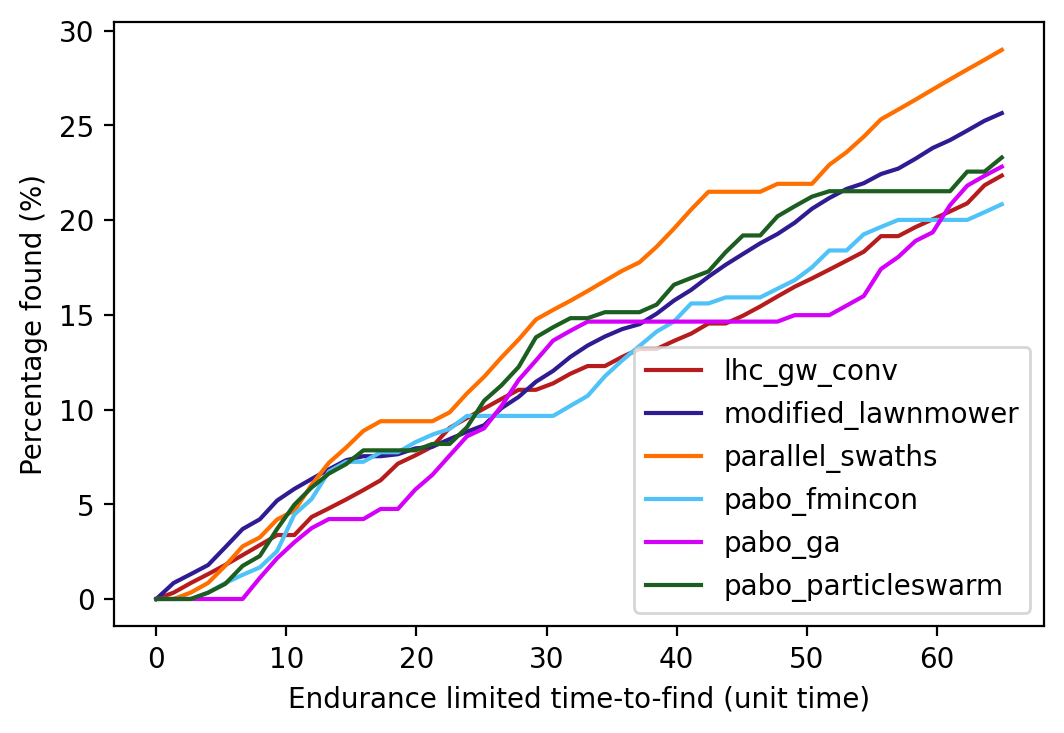

In [56]:
x_max = -np.inf
for alg,d in dct.items():
    t_hist = d['t_hist']
    y = []
    x = []
    if max(t_hist)>x_max:x_max = max(t_hist)
    for i in np.linspace(0,max(t_hist)):
        x.append(i)
        y.append(100*np.sum(t_hist<i)/total_objects)

    plt.plot(x,y,label=f"{str(alg).split('.')[1].lower()}",color=d['color'])

plt.legend(loc='lower right')
plt.ylabel("Percentage found (%)")
plt.xlabel("Endurance limited time-to-find (unit time)")
fig = plt.gcf()
plt.show()
fig.savefig("endurance_limited_time-to-find.png",dpi=300)
